In [9]:
# Import usual packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
import scipy.constants as const
from scipy import stats
from scipy.stats import poisson
from scipy.stats import uniform
from tabulate import tabulate
%matplotlib inline

# Numpy Random Seed

In [4]:
# Produce random series to use for checking this lab's results
np.random.seed(0)

# Variable of Transformation
For a random distribution of x between 0 and 1 with variable transformation $u=f(x)$, we can calculate the probability density function $g(u)$ using an analytic method. In this assignment, we will draw a random sample from the uniform distribution, apply a transformation to each data point, and check the consistency of transformed distributions with the analytic prediction.

1. Draw a 1000 events sample between $x_i, i=0,1,...,999$ using built in distributions in scipy with uniform density between 0 and 1.
2. For each value of $x_i$, calculate the transformed value $u=x^2$
3. Draw the $u_i$ distribution. Plot the analytic solution $g(u)$ in the same plot and compare the consistency. Show detils about how you derive $g(u)$ analytically.
4. Repeat step 1,2,3 with one of the transformation functions below.
        \begin{equation}
        i)\   u=1/x \\
        ii)\   u=\sqrt(x) \\
        iii)\   u=e^x \\
        iv)\   u=log(x)
        \end{equation}
        

1. Draw a 1000 events sample between $x_i, i=0,1,...,999$ using built in distributions in scipy with uniform density between 0 and 1.

In [10]:
# 1. Draw 1000 events sample between x_1-x_999 with uniform density between 0 and 1
x = uniform.rvs(size=1000)

2. For each value of $x_i$, calculate the transformed value $u=x^2$

In [11]:
# define u and g from calculations above 
u = x ** 2
g = np.sqrt(u) / 2




3. Draw the $u_i$ distribution. Plot the analytic solution $g(u)$ in the same plot and compare the consistency. Show detils about how you derive $g(u)$ analytically.

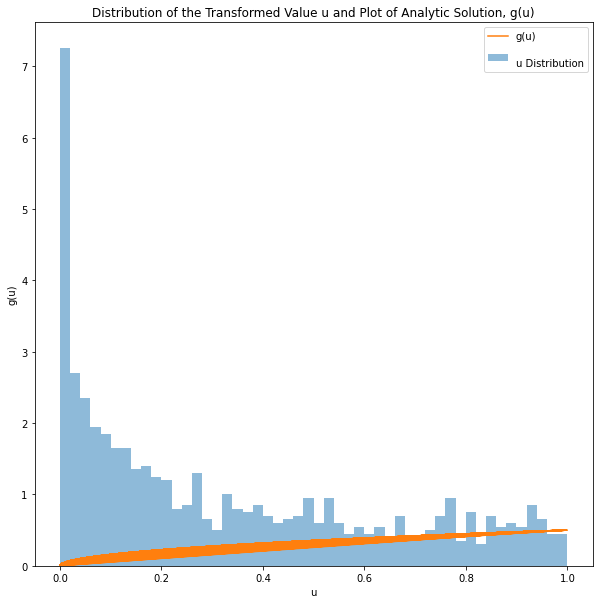

In [12]:
# define function to fill array of analytic solutions g(u) for each value of x_i and u 
def g(u):
    return np.sqrt(u) / 2

# Plot the distribution of the transformed variable u (histogram) with a plot of the analytic solution g(u) 
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.hist(u, bins=50, density=True, alpha=0.5)
ax.plot(u, g(u))

plt.title("Distribution of the Transformed Value u and Plot of Analytic Solution, g(u)")
plt.xlabel("u")
plt.ylabel("g(u)")

ax.legend(["g(u)", "\nu Distribution"])

4. Repeat step 1,2,3 with one of the transformation functions below.
        \begin{equation}
        i)\   u=1/x \\
        ii)\   u=\sqrt(x) \\
        iii)\   u=e^x \\
        iv)\   u=log(x)
        \end{equation}

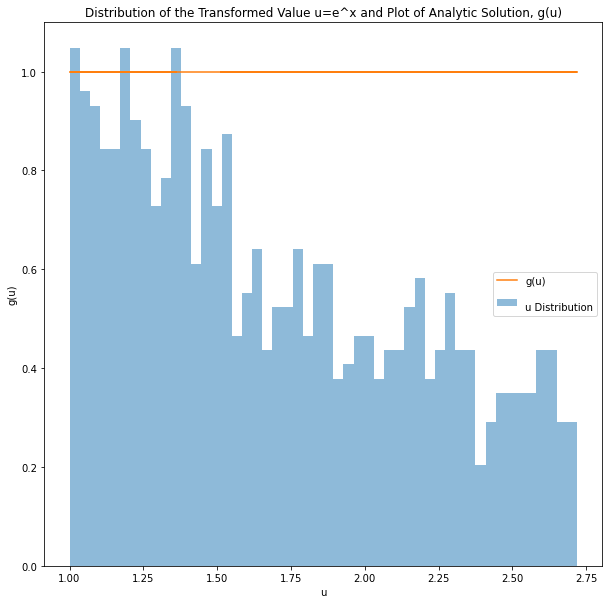

In [15]:
# For u=e^x repeat
# Draw 1000 event sample
x = uniform.rvs(size=1000)

# Define u and g(u)
u = np.exp(x)
g = u / u

# Define g(u) function and plot u distribution over g(u) plot
def g2(u):
    return u / u

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.hist(u, bins=50, density=True, alpha=0.5)
ax.plot(u, g2(u))

plt.title("Distribution of the Transformed Value u=e^x and Plot of Analytic Solution, g(u)")
plt.xlabel("u")
plt.ylabel("g(u)")

ax.legend(["g(u)", "\nu Distribution"])

# Throwing 2 Dice
We can simulate a fair dice by drawing a random uniform distribution of x between 0 and 1. There are multiple ways to do so, e.g. multiply a random nyumber x by 6, take the integer part of the number and add it by one ($[0,1]\rightarrow[0,5]\rightarrow[1,6]$), or use numpy.random.uniform(). This numbre represents the face of the dice. We cn repeat this procedure to simulate rolling the dice N times.

1. Simulate a pair of dice $N=1000$ times.
2. Calcuate the sum of each pair.
3. Draw the distribution of the sum.
4. Calculate mean and cariance of the distribution of the sum.
5. Calculate the probability of sevens (i.e. sum of two dices equals to 7) by taking the ratio of this number of sevens to 1000. Evaluate the statistical uncertainty of the probability (assuming Binomil errors).
6. Compare the probability of sevens from step 5 to the analytic calcuation based on the homework method. Discuss consistency between the simulation and analytic calculation.


In [17]:
# Function to simulate a pair of dice and calculate the sum of each pair 
def dice_throws(dice, throws):
    return np.sum(np.random.randint(1,7,(dice, throws)), axis=0)

In [18]:
# Simulate a pair for N=1000 throws 
sum_throws = dice_throws(2, 1000)


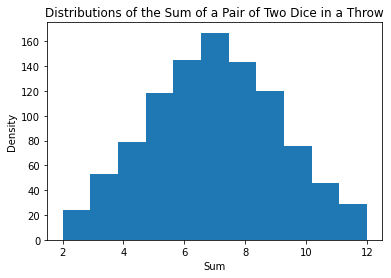

In [20]:
# Function puts out histogram of distribution of the sum (sum_throws) given bins
def dice_throws_hist(sum_throws, bins):
    plt.hist(sum_throws, bins)
    plt.xlabel("Sum")
    plt.ylabel("Density")
    plt.title("Distributions of the Sum of a Pair of Two Dice in a Throw")
    plt.show()
    
dice_throws_hist(sum_throws, 11)        


In [22]:
# Mean and Variance of the sum
variance = np.var(sum_throws, axis=None)
mean = np.mean(sum_throws, axis=None)

print("The variance of the dice throw sum distribution is:", variance)
print("The mean of the dice throw sum distribution is:", mean)

The variance of the dice throw sum distribution is: 5.543900000000001
The mean of the dice throw sum distribution is: 6.99


In [24]:
# Probability of sevens
prob_sevens = np.count_nonzero(sum_throws == 7) / 1000
print("The probability of rolling a sum of sevens for N=1000 is", prob_sevens)

# Calculate uncertainty in the probability as the standard error of the binomial proportion
uncertainty_sevens = np.sqrt((prob_sevens * (1 - prob_sevens)) / 1000)
print("The statistical uncertainty in the probability of sevens is", uncertainty_sevens)

The probability of sevens is 0.167
The statistical uncertainty in the probability of sevens is 0.01179453263168999


In [26]:
# Find the probability of sevens using the analytical method and compare
prob_sevens_analytical = 6 * ((1 / 6) * (1 / 6))
print("The analytical probability of rolling a sum of sevens for N=1000 is", prob_sevens_analytical)

The analytical probability of rolling a sum of sevens for N=1000 is 0.16666666666666666


The probability of rolling two dice to a sum of sevens for N=1000 rolls is 0.167 using the simulation method and 0.166 using the analytical method. Both are very close with less than 0.2% difference. The analytical solution also falls well within the range of uncertainty found for a sum of sevens using the simulation.

# Central Limit Theorem
The central limit theorem states that the distribution of the sample mean $\bar{x}$, $\bar{x}=\frac{1}{N}\sum_{i=1}^{N}x_i$ of N variables $x_i$ with finite variance $\sigma^2$ in the limit $N\to \infty$ will approach a normal distribution with variance $\sigma^2/N$ independent of the form of the distribution f(x). In this computational experiment, we will test this theorem. Generate a $M=5$ event sample using built-in Poisson distributions in scipy with $\lambda=2.0$. From these 5 events, calculate the mean $\mu_5$ and standard deviation $\sigma_5$. Repeat this process N times. For each time, you will draw different sets of $M=5$ events,and calculate independent $\mu_5$ and, $\sigma_5$ respectively.

1. Let N=10. Plot distributions of $\mu_5$ and $\sigma_5$. For each plot, indicate the mean and variance in the legend.
2. Let N=100. Plot distributions of $\mu_5$ and $\sigma_5$. For each plot, indicate the mean and variance in the legend.
3. Let N=1000. Plot distributions of $\mu_5$ and $\sigma_5$. For each plot, indicate the mean and variance in the legend.
4. Discuss your observation. 

        i) Do $\mu_5$ and $\sigma_5$ approach normal distributions when N is approaching a larger number?
        ii) Is the variance of $\mu_5$ and $\sigma_5$ following some scaling rule as a function of N?
5. Fix N=1000, plot distribition of $\mu_100$ and $\sigma_100$ which are mean and standard deviaation of a sample of $M=100$ events with $\lambda=2.0$. Discuss your observation.

# Bonus
Generate 1000 samples. Each sample is a 100 event dataset using one built-in distribution in scipy but not Binomil, Normal, nor Poisson. Show that the mean and variance of these 1000 samples also behave like a normal distribution. 